# [ATM 623: Climate Modeling](../index.ipynb)
[Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany
# Lecture 14: The one-dimensional energy balance model

### About these notes:

This document uses the interactive [`IPython notebook`](http://ipython.org/notebook.html) format (now also called [`Jupyter`](https://jupyter.org)). The notes can be accessed in several different ways:

- The interactive notebooks are hosted on `github` at https://github.com/brian-rose/ClimateModeling_courseware
- The latest versions can be viewed as static web pages [rendered on nbviewer](http://nbviewer.ipython.org/github/brian-rose/ClimateModeling_courseware/blob/master/index.ipynb)
- A complete snapshot of the notes as of May 2015 (end of spring semester) are [available on Brian's website](http://www.atmos.albany.edu/facstaff/brose/classes/ATM623_Spring2015/Notes/index.html).

Many of these notes make use of the `climlab` package, available at https://github.com/brian-rose/climlab

## Contents

1. [Simulation versus parameterization of heat transport](#section1)
2. [The temperature diffusion parameterization](#section2)
3. [Solving the temperature diffusion equation with `climlab`](#section3)
4. [Parameterizing the radiation terms](#section4)
5. [The one-dimensional diffusive energy balance model](#section5)
6. [The annual-mean EBM](#section6)
7. [Effects of diffusivity in the EBM](#section7)
8. [Summary: parameter values in the diffusive EBM](#section8)

____________
<a id='section1'></a>

## 1. Simulation versus parameterization of heat transport
____________


In the previous lectures we have seen how heat transport by winds and ocean currents acts to COOL the tropics and WARM the poles. The observed temperature gradient is a product of both the insolation and the heat transport!

We were able to ignore this issue in our models of the global mean temperature, because the transport just moves energy around between latitude bands – does not create or destroy energy.

But if want to move beyond the global mean and create models of the equator-to-pole temperature structure, we cannot ignore heat transport. Has to be included somehow!

This leads to us the old theme of **simulation versus parameterization**.

Complex climate models like the CESM simulate the heat transport by solving the full equations of motion for the atmosphere (and ocean too, if coupled).

### Simulation of synoptic-scale variability in CESM

Let's revisit an animation of the global 6-hourly sea-level pressure field from our slab ocean simulation with CESM. (We first saw this [back in Lecture 4](Lecture04 -- Climate system components.ipynb)) 

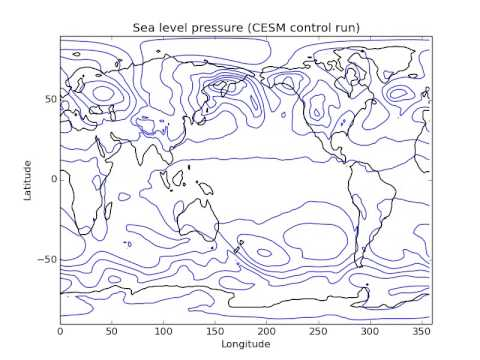

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('As85L34fKYQ')

All these traveling weather systems tend to move **warm, moist air poleward** and **cold, dry air equatorward**. There is thus a **net poleward energy transport**.

A model like this needs to **simulate the weather** in order to **model the heat transport**.  

### A simpler statistical approach

Let’s emphasize: the most important role for heat transport by winds and ocean currents is to more energy from where it’s WARM to where it’s COLD, thereby reducing the temperature gradient (equator to pole) from what it would be if the planet were in radiative-convective equilibrium everywhere with no north-south motion.

This is the basis for the parameterization of heat transport often used in simple climate models.

Discuss analogy with molecular heat conduction: metal rod with one end in the fire.

Define carefully temperature gradient dTs / dy
Measures how quickly the temperature  decreases as we move northward
(negative in NH, positive in SH)

In any conduction or diffusion process, the flux (transport) of a quantity is always DOWN-gradient  (from WARM to COLD).

So our parameterization will look like

$$ \mathcal{H} = -K ~ dT / dy $$

Where $K$ is some positive number “diffusivity of the climate system”.



____________
<a id='section2'></a>

## 2. The temperature diffusion parameterization
____________



Last time we wrote down an energy budget for a thin zonal band centered at latitude $\phi$:

$$ \frac{\partial E(\phi)}{\partial t} = \text{ASR}(\phi) - \text{OLR}(\phi) - \frac{1}{2 \pi a^2  \cos⁡\phi } \frac{\partial \mathcal{H}}{\partial \phi} $$

where we have written every term as an explicit function of latitude to remind ourselves that this is a **local** budget, unlike the zero-dimensional global budget we considered at the start of the course.

Let’s now formally introduce a parameterization that **approximates the heat transport as a down-gradient diffusion process**:

$$ \mathcal{H}(\phi) \approx -2 \pi a^2  \cos⁡\phi ~ D ~ \frac{\partial T_s}{\partial \phi} $$

With $D$ a parameter for the **diffusivity** or **thermal conductivity** of the climate system, a number in W m$^{-2}$ ºC$^{-1}$.

The value of $D$ will be chosen to match observations – i.e. tuned.

Notice that we have explicitly chosen to the use **surface temperature gradient** to set the heat transport. This is a convenient (and traditional) choice to make, but it is not the only possibility! We could instead tune our parameterization to some measure of the free-tropospheric temperature gradient.

## The diffusive parameterization in the planetary energy budget

Plug the parameterization into our energy budget to get

$$ \frac{\partial E(\phi)}{\partial t} = \text{ASR}(\phi) - \text{OLR}(\phi) - \frac{1}{2 \pi a^2  \cos⁡\phi } \frac{\partial }{\partial \phi} \left( -2 \pi a^2  \cos⁡\phi ~ D ~ \frac{\partial T_s}{\partial \phi} \right) $$

If we assume that $D$ is a constant (does not vary with latitude), then this simplifies to

$$ \frac{\partial E(\phi)}{\partial t} = \text{ASR}(\phi) - \text{OLR}(\phi) + \frac{D}{\cos⁡\phi } \frac{\partial }{\partial \phi} \left(   \cos⁡\phi  ~ \frac{\partial T_s}{\partial \phi} \right) $$


### Surface temperature is a good measure of column heat content

Let's now make the same assumption we made [back at the beginning of the course](Lecture01 -- Planetary energy budget.ipynb) when we first wrote down the zero-dimensional EBM.  

*Most of the heat capacity is in the oceans, so that the energy content of each column $E$ is proportional to surface temperature*:

$$ E(\phi) = C(\phi) ~ T_s(\phi) $$

where $C$ is **effective heat capacity** of the atmosphere - ocean column, in units of J m$^{-2}$ K$^{-1}$. Here we are writing $C$ are a function of latitude so that our model is general enough to allow different land-ocean fractions at different latitudes.

### A heat equation for surface temperature

Now our budget becomes a PDE for the surface temperature $T_s(\phi, t)$:

$$ C(\phi) \frac{\partial T_s}{\partial t} = \text{ASR}(\phi) - \text{OLR}(\phi) + \frac{D}{\cos⁡\phi } \frac{\partial }{\partial \phi} \left(   \cos⁡\phi  ~ \frac{\partial T_s}{\partial \phi} \right) $$

Notice that if we were NOT on a spherical planet and didn’t have to worry about the changing size of latitude circles, this would look something like

$$ \frac{\partial T}{\partial t} = K \frac{\partial^2 T}{\partial y^2} + \text{forcing terms} $$
with $K = D/C$ in m$^{2}$ s$^{-1}$.

Does equation look familiar?

This is the *heat equation*, one of the central equations in classical mathematical physics. 

This equation describes the behavior of a diffusive system, i.e. how mixing by random molecular motion smears out the temperature. 

In our case, the analogy is between the random molecular motion of a metal rod, and the net mixing / stirring effect of weather systems.


### Take the global average...

Take the integral $\int_{-\pi/2}^{\pi/2} \cos\phi ~ d\phi$ of each term.


$$ C \frac{\partial \overline{T_s}}{\partial t} d\phi = \overline{\text{ASR}} - \overline{\text{OLR}} + K \int_{-\pi/2}^{\pi/2} \frac{\partial }{\partial \phi} \left(   \cos⁡\phi  ~ \frac{\partial T_s}{\partial \phi} \right) d\phi$$

The global average of the last term (heat transport) must go to zero (why?)

Therefore this reduces to our familiar zero-dimensional EBM.


____________
<a id='section3'></a>

## 3. Solving the temperature diffusion equation with `climlab`
____________


`climlab` has a pre-defined process for solving the meridional diffusion equation. Let's look at a simple example in which diffusion is the ONLY process that changes the temperature.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import climlab
from climlab import constants as const

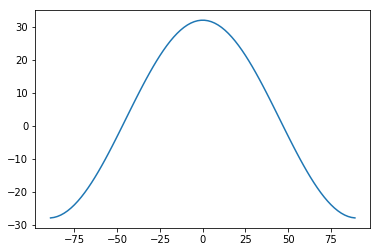

In [3]:
#  First define an initial temperature field
#   that is warm at the equator and cold at the poles
#   and varies smoothly with latitude in between

from climlab.utils import legendre
sfc = climlab.domain.zonal_mean_surface(num_lat=90, water_depth=10.)
lat = sfc.lat.points
initial = 12. - 40. * legendre.P2(np.sin(np.deg2rad(lat)))

plt.plot(lat, initial)

In [4]:
##  Set up the climlab diffusion process

# make a copy of initial so that it remains unmodified
Ts = climlab.Field(np.array(initial), domain=sfc)
# thermal diffusivity in W/m**2/degC
D = 0.55
# meridional diffusivity in 1/s
K = D / sfc.heat_capacity
# create the climlab diffusion process
#  setting the diffusivity and a timestep of ONE MONTH
d = climlab.dynamics.MeridionalDiffusion(state=Ts, K=K, 
                        timestep=const.seconds_per_month)

print d

climlab Process of type <class 'climlab.dynamics.diffusion.MeridionalDiffusion'>. 
State variables and domain shapes: 
  default: (90, 1) 
The subprocess tree: 
top: <class 'climlab.dynamics.diffusion.MeridionalDiffusion'>



In [5]:
#  We are going to step forward one month at a time
#  and store the temperature each time
niter = 5
temp = np.zeros((Ts.size, niter+1))
temp[:, 0] = np.squeeze(Ts)
for n in range(niter):
    d.step_forward()
    temp[:, n+1] = np.squeeze(Ts)

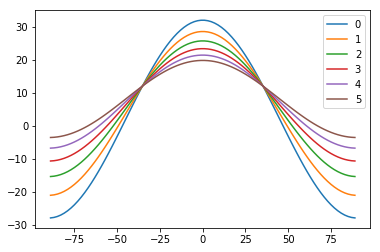

In [6]:
#  Now plot the temperatures
plt.plot(lat, temp)
plt.legend(range(niter+1))

At each timestep, the warm temperatures get cooler (at the equator) while the cold polar temperatures get warmer!

Diffusion is acting to **reduce the temperature gradient**.

If we let this run a long time, what should happen??

Try it yourself and find out!

### Mathematical aside: the Legendre Polynomials

Here we have used a function called the “2nd Legendre polynomial”, defined as

$$ P_2 (x) = \frac{1}{2} \left( 3x^2-1 \right) $$

where we have also set

$$ x = \sin\phi $$

Just turns out to be a useful mathematical description of the relatively smooth changes in things like annual-mean insolation from equator to pole.

In fact these are so useful that they are coded up in a special module within `climlab`:

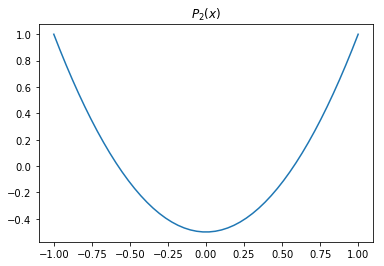

In [7]:
x = np.linspace(-1,1)
plt.plot(x, legendre.P2(x))
plt.title('$P_2(x)$')

____________
<a id='section4'></a>

## 4. Parameterizing the radiation terms
____________

Let's go back to the complete budget with our heat transport parameterization

$$ C(\phi) \frac{\partial T_s}{\partial t} = \text{ASR}(\phi) - \text{OLR}(\phi) + \frac{D}{\cos⁡\phi } \frac{\partial }{\partial \phi} \left(   \cos⁡\phi  ~ \frac{\partial T_s}{\partial \phi} \right) $$

We want to express this **as a closed equation for surface temperature $T_s$**.

First, as usual, we can write the solar term as

$$ \text{ASR} = (1-\alpha) ~ Q $$

For now, we will **assume that the planetary albedo is fixed (does not depend on temperature)**. Therefore the entire shortwave term $(1-\alpha) Q$ is a fixed source term in our budget. It varies in space and time but does not depend on $T_s$.

Note that the solar term is (at least in annual average) larger at equator than poles… and transport term acts to flatten out the temperatures.

Now, we almost have a model we can solve for T!  Just need to express the OLR in terms of temperature.

So…  what’s the link between OLR and temperature????

[ discuss ]

We spent a good chunk of the course looking at this question, and developed a model of a vertical column of air.

We are trying now to build a model of the equator-to-pole (or pole-to-pole) temperature structure.

We COULD use an array of column models, representing temperature as a function of height and latitude (and time).

But instead, we will keep things simple, one spatial dimension at a time.

Introduce the following simple parameterization:

$$ OLR = A + B T_s $$

With $T_s$ the zonal average surface temperature in ºC, A is a constant in W m$^{-2}$ and B is a constant in W m$^{-2}$ ºC$^{-1}$.

### OLR versus surface temperature in NCEP Reanalysis data

Let's look at the data to find reasonable values for $A$ and $B$.

In [8]:
import xarray as xr
ncep_url = "http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/"
ncep_air = xr.open_dataset( ncep_url + "pressure/air.mon.1981-2010.ltm.nc", decode_times=False)
ncep_Ts = xr.open_dataset( ncep_url + "surface_gauss/skt.sfc.mon.1981-2010.ltm.nc", decode_times=False)
lat_ncep = ncep_Ts.lat; lon_ncep = ncep_Ts.lon
print ncep_Ts

<xarray.Dataset>
Dimensions:             (lat: 94, lon: 192, nbnds: 2, time: 12)
Coordinates:
  * lon                 (lon) float32 0.0 1.875 3.75 5.625 7.5 9.375 11.25 ...
  * time                (time) float64 -6.571e+05 -6.57e+05 -6.57e+05 ...
  * lat                 (lat) float32 88.542 86.6531 84.7532 82.8508 80.9473 ...
  * nbnds               (nbnds) int64 0 1
Data variables:
    climatology_bounds  (time, nbnds) float64 ...
    skt                 (time, lat, lon) float64 ...
    valid_yr_count      (time, lat, lon) float64 ...
Attributes:
    title: 4x daily NMC reanalysis
    description: Data is from NMC initialized reanalysis
(4x/day).  It consists of T42  variables interpolated to
pressure surfaces from model (sigma) surfaces.
    platform: Model
    Conventions: COARDS
    not_missing_threshold_percent: minimum 3% values input to have non-missing output value
    history: Created 2011/07/12 by doMonthLTM
Converted to chunked, deflated non-packed NetCDF4 2014/09
    Refere

In [9]:
Ts_ncep_annual = ncep_Ts.skt.mean(dim=('lon','time'))

In [10]:
ncep_ulwrf = xr.open_dataset( ncep_url + "other_gauss/ulwrf.ntat.mon.1981-2010.ltm.nc", decode_times=False)
ncep_dswrf = xr.open_dataset( ncep_url + "other_gauss/dswrf.ntat.mon.1981-2010.ltm.nc", decode_times=False)
ncep_uswrf = xr.open_dataset( ncep_url + "other_gauss/uswrf.ntat.mon.1981-2010.ltm.nc", decode_times=False)
OLR_ncep_annual = ncep_ulwrf.ulwrf.mean(dim=('lon','time'))
ASR_ncep_annual = (ncep_dswrf.dswrf - ncep_uswrf.uswrf).mean(dim=('lon','time'))

In [11]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(Ts_ncep_annual, OLR_ncep_annual)

print 'Best fit is A = %0.0f W/m2 and B = %0.1f W/m2/degC' %(intercept, slope)

Best fit is A = 214 W/m2 and B = 1.6 W/m2/degC


We're going to plot the data and the best fit line, but also another line using these values:

In [12]:
#  More standard values
A = 210.
B = 2.

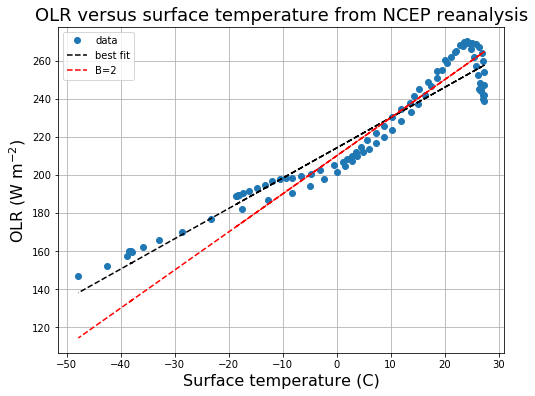

In [13]:
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot( Ts_ncep_annual, OLR_ncep_annual, 'o' , label='data')
ax1.plot( Ts_ncep_annual, intercept + slope * Ts_ncep_annual, 'k--', label='best fit')
ax1.plot( Ts_ncep_annual, A + B * Ts_ncep_annual, 'r--', label='B=2')
ax1.set_xlabel('Surface temperature (C)', fontsize=16)
ax1.set_ylabel('OLR (W m$^{-2}$)', fontsize=16)
ax1.set_title('OLR versus surface temperature from NCEP reanalysis', fontsize=18)
ax1.legend(loc='upper left')
ax1.grid()

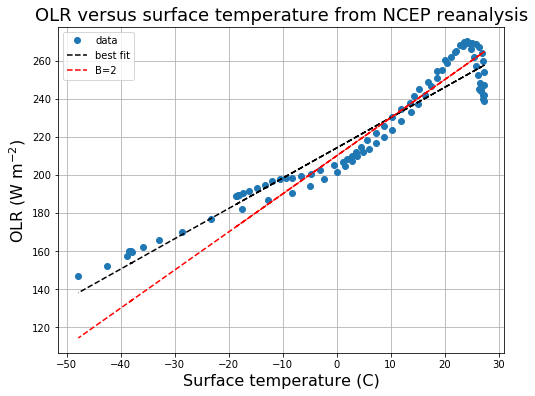

In [14]:
fig

Discuss these curves...

Suggestion of at least 3 different regimes with different slopes (cold, medium, warm).

Unbiased "best fit" is actually a poor fit over all the intermediate temperatures.

The astute reader will note that...   by taking the zonal average of the data before the regression, we are biasing this estimate toward cold temperatures.  [WHY?]


Let's take these reference values:

$$ A = 210 ~ \text{W m}^{-2}, ~~~ B = 2 ~ \text{W m}^{-2}~^\circ\text{C}^{-1} $$

Note that in the **global average**, recall $\overline{T_s} = 288 \text{ K} = 15^\circ\text{C}$

And so this parameterization gives 

$$ \overline{\text{OLR}} = 210 + 15 \times 2 = 240 ~\text{W m}^{-2} $$

And the observed global mean is $\overline{\text{OLR}} = 239 ~\text{W m}^{-2} $
So this is consistent.



____________
<a id='section5'></a>

## 5. The one-dimensional diffusive energy balance model
____________


Putting the above OLR parameterization into our budget equation gives

$$ C(\phi) \frac{\partial T_s}{\partial t} = (1-\alpha) ~ Q - \left( A + B~T_s \right) + \frac{D}{\cos⁡\phi } \frac{\partial }{\partial \phi} \left(   \cos⁡\phi  ~ \frac{\partial T_s}{\partial \phi} \right) $$

This is the equation for a very important and useful simple model of the climate system. It is typically referred to as the (one-dimensional) Energy Balance Model.

(although as we have seen over and over, EVERY climate model is actually an “energy balance model” of some kind)

Also for historical reasons this is often called the **Budyko-Sellers model**, after Budyko and Sellers who both (independently of each other) published influential papers on this subject in 1969.

Recap: parameters in this model are

- C: heat capacity in J m$^{-2}$ ºC$^{-1}$
- A: longwave emission at 0ºC in W m$^{-2}$
- B: increase in emission per degree, in W m$^{-2}$ ºC$^{-1}$
- D: horizontal (north-south) diffusivity of the climate system in W m$^{-2}$ ºC$^{-1}$

We also need to specify the albedo.

### Tune albedo formula to match observations

Let's go back to the NCEP Reanalysis data to see how planetary albedo actually varies as a function of latitude.

In [15]:
days = np.linspace(1.,50.)/50 * const.days_per_year
Qann_ncep = np.mean( climlab.solar.insolation.daily_insolation(lat_ncep, days ),axis=1)
albedo_ncep = 1 - ASR_ncep_annual / Qann_ncep

albedo_ncep_global = np.average(albedo_ncep, weights=np.cos(np.deg2rad(lat_ncep)))

The annual, global mean planetary albedo is 0.354


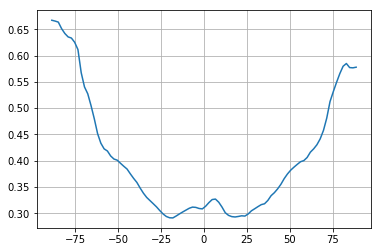

In [16]:
print 'The annual, global mean planetary albedo is %0.3f' %albedo_ncep_global

plt.plot(lat_ncep, albedo_ncep)
plt.grid();

**The albedo increases markedly toward the poles.**

There are several reasons for this:

- surface snow and ice increase toward the poles
- Cloudiness is an important (but complicated) factor.
- Albedo increases with solar zenith angle (the angle at which the direct solar beam strikes a surface)

#### Approximating the observed albedo with a Legendre polynomial

Like temperature and insolation, this can be approximated by a smooth function that increases with latitude:

$$ \alpha(\phi) \approx \alpha_0 + \alpha_2 P_2(\sin\phi) $$

where $P_2$ is the 2nd Legendre polynomial (see above).

In effect we are using a truncated series expansion of the full meridional structure of $\alpha$. $a_0$ is the global average, and $a_2$ is proportional to the equator-to-pole gradient in $\alpha$.

We will set

$$ \alpha_0 = 0.354, ~~~ \alpha_2 = 0.25 $$

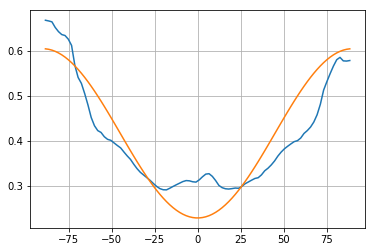

In [17]:
a0 = albedo_ncep_global
a2 = 0.25
plt.plot(lat_ncep, albedo_ncep);
plt.plot(lat_ncep, a0 + a2 * legendre.P2(np.sin(np.deg2rad(lat_ncep))))
plt.grid();

Of course we are not fitting all the details of the observed albedo curve. But we do get the correct global mean a reasonable representation of the equator-to-pole gradient in albedo.

____________
<a id='section6'></a>

## 6. The annual-mean EBM
____________



Suppose we take the **annual mean of the planetary energy budget**.

If the albedo is fixed, then the average is pretty simple. Our EBM equation is purely linear, so the change over one year is just

$$ C \frac{\Delta \overline{T_s}}{\text{1 year}} = \left(1-\alpha(\phi) \right) ~ \overline{Q}(\phi) - \left( A + B~\overline{T_s} \right) + \frac{D}{\cos⁡\phi } \frac{\partial }{\partial \phi} \left(   \cos⁡\phi  ~ \frac{\partial \overline{T_s}}{\partial \phi} \right) $$

where $\overline{T_s}(\phi)$ is the annual mean surface temperature, and $\overline{Q}(\phi)$ is the annual mean insolation (both functions of latitude).

Notice that once we average over the seasonal cycle, there are no time-dependent forcing terms. The temperature will just evolve toward a steady equilibrium.

The equilibrium temperature is then the solution of this Ordinary Differential Equation (setting $\Delta \overline{T_s} = 0$ above):

$$ 0 = \left(1-\alpha(\phi) \right) ~ \overline{Q}(\phi) - \left( A + B~\overline{T_s} \right) + \frac{D}{\cos⁡\phi } \frac{d }{d \phi} \left(   \cos⁡\phi  ~ \frac{d \overline{T_s}}{d \phi} \right) $$

You will often see this equation written in terms of the independent variable

$$ x = \sin\phi $$

which is 0 at the equator and $\pm1$ at the poles. Substituting this for $\phi$, noting that $dx = \cos\phi~ d\phi$ and rearranging a bit gives

$$  \frac{D}{B} \frac{d }{d x} \left(   (1-x^2)  ~ \frac{d \overline{T_s}}{d x} \right) - \overline{T_s} = -\frac{\left(1-\alpha(x) \right) ~ \overline{Q}(x) - A}{B}  $$

This is actually a 2nd order ODE, and actually a 2-point Boundary Value Problem for the temperature $T(x)$, where the boundary conditions are no-flux at the boundaries (usually the poles).

This form can be convenient for analytical solutions. As we will see, the non-dimensional number $D/B$ is a very important measure of the efficiency of heat transport in the climate system.  We will return to this later.

### Numerical solutions of the time-dependent EBM

We will leave the time derivative in our model, because this is the most convenient way to find the equilibrium solution!

There is code available in `climlab` to solve the diffusive EBM.

### Animating the adjustment of annual mean EBM to equilibrium

Before looking at the details of how to set up an EBM in `climlab`, let's look at an animation of the adjustment of the model (its temperature and energy budget) from an isothermal initial condition.

For reference, all the code necessary to generate the animation is here in the notebook.

In [18]:
#  Some imports needed to make and display animations
from IPython.display import HTML
from matplotlib import animation

def setup_figure():
    templimits = -20,32
    radlimits = -340, 340
    htlimits = -6,6
    latlimits = -90,90
    lat_ticks = np.arange(-90,90,30)

    fig, axes = plt.subplots(3,1,figsize=(8,10))
    axes[0].set_ylabel('Temperature (deg C)')
    axes[0].set_ylim(templimits)
    axes[1].set_ylabel('Energy budget (W m$^{-2}$)')
    axes[1].set_ylim(radlimits)
    axes[2].set_ylabel('Heat transport (PW)')
    axes[2].set_ylim(htlimits)
    axes[2].set_xlabel('Latitude')
    for ax in axes: ax.set_xlim(latlimits); ax.set_xticks(lat_ticks); ax.grid()
    fig.suptitle('Diffusive energy balance model with annual-mean insolation', fontsize=14)
    return fig, axes

def initial_figure(model):
    #  Make figure and axes
    fig, axes = setup_figure()
    # plot initial data
    lines = []
    lines.append(axes[0].plot(model.lat, model.Ts)[0])
    lines.append(axes[1].plot(model.lat, model.ASR, 'k--', label='SW')[0])
    lines.append(axes[1].plot(model.lat, -model.OLR, 'r--', label='LW')[0])
    lines.append(axes[1].plot(model.lat, model.net_radiation, 'c-', label='net rad')[0])
    lines.append(axes[1].plot(model.lat, model.heat_transport_convergence(), 'g--', label='dyn')[0])
    lines.append(axes[1].plot(model.lat, 
        np.squeeze(model.net_radiation)+model.heat_transport_convergence(), 'b-', label='total')[0])
    axes[1].legend(loc='upper right')
    lines.append(axes[2].plot(model.lat_bounds, model.diffusive_heat_transport())[0])
    lines.append(axes[0].text(60, 25, 'Day 0'))
    return fig, axes, lines

def animate(day, model, lines):
    model.step_forward()
    #  The rest of this is just updating the plot
    lines[0].set_ydata(model.Ts)
    lines[1].set_ydata(model.ASR)
    lines[2].set_ydata(-model.OLR)
    lines[3].set_ydata(model.net_radiation)
    lines[4].set_ydata(model.heat_transport_convergence())
    lines[5].set_ydata(np.squeeze(model.net_radiation)+model.heat_transport_convergence())
    lines[6].set_ydata(model.diffusive_heat_transport())
    lines[-1].set_text('Day {}'.format(int(model.time['days_elapsed'])))
    return lines   

In [19]:
#  A model starting from isothermal initial conditions
e = climlab.EBM_annual()
e.Ts[:] = 15.  # in degrees Celsius
e.compute_diagnostics()

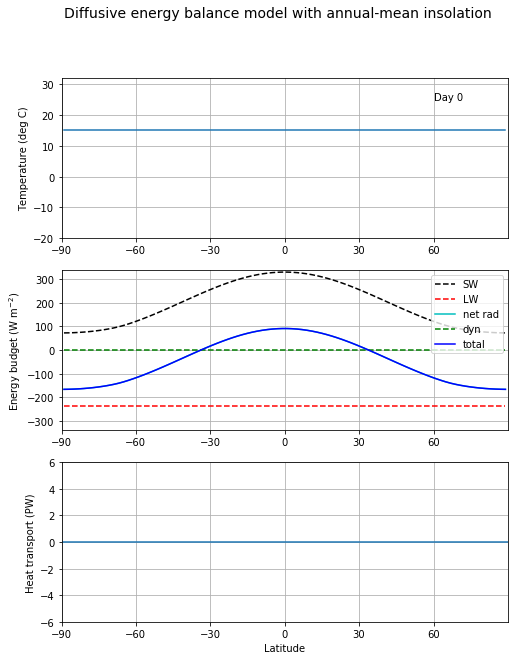

In [20]:
#  Plot initial data
fig, axes, lines = initial_figure(e)

In [21]:
ani = animation.FuncAnimation(fig, animate, frames=np.arange(1, 100), fargs=(e, lines))

In [22]:
HTML(ani.to_html5_video())

###  Example EBM using `climlab`

Here is a simple example using the parameter values we just discussed.

For simplicity, this model will use the **annual mean insolation**, so the forcing is steady in time.

We haven't yet selected an appropriate value for the diffusivity $D$. Let's just try something and see what happens:

In [23]:
D = 0.1
model = climlab.EBM_annual(A=210, B=2, D=D, a0=0.354, a2=0.25)
print model

climlab Process of type <class 'climlab.model.ebm.EBM_annual'>. 
State variables and domain shapes: 
  Ts: (90, 1) 
The subprocess tree: 
top: <class 'climlab.model.ebm.EBM_annual'>
   diffusion: <class 'climlab.dynamics.diffusion.MeridionalDiffusion'>
   LW: <class 'climlab.radiation.aplusbt.AplusBT'>
   albedo: <class 'climlab.surface.albedo.P2Albedo'>
   insolation: <class 'climlab.radiation.insolation.AnnualMeanInsolation'>



In [24]:
model.param

{'A': 210,
 'B': 2,
 'D': 0.1,
 'S0': 1365.2,
 'a0': 0.354,
 'a2': 0.25,
 'timestep': 350632.51200000005,
 'water_depth': 10.0}

In [25]:
model.integrate_years(10)

Integrating for 900 steps, 3652.422 days, or 10 years.
Total elapsed time is 10.0 years.


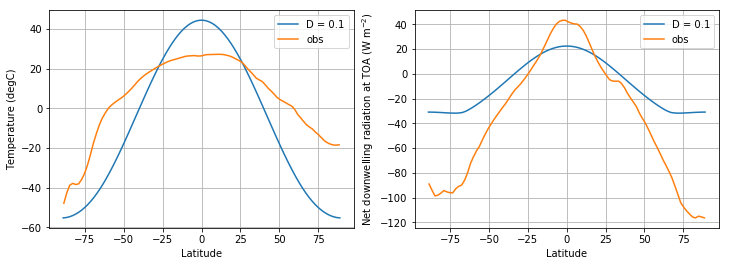

In [26]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
ax = axes[0]
ax.plot(model.lat, model.Ts, label=('D = %0.1f' %D))
ax.plot(lat_ncep, Ts_ncep_annual, label='obs')
ax.set_ylabel('Temperature (degC)')
ax = axes[1]
energy_in = np.squeeze(model.ASR - model.OLR)
ax.plot(model.lat, energy_in, label=('D = %0.1f' %D))
ax.plot(lat_ncep, ASR_ncep_annual - OLR_ncep_annual, label='obs')
ax.set_ylabel('Net downwelling radiation at TOA (W m$^{-2}$)')
for ax in axes:
    ax.set_xlabel('Latitude'); ax.legend(); ax.grid()

In [27]:
def inferred_heat_transport( energy_in, lat_deg ):
    '''Returns the inferred heat transport (in PW) by integrating the net energy imbalance from pole to pole.'''
    from scipy import integrate
    from climlab import constants as const
    lat_rad = np.deg2rad( lat_deg )
    return ( 1E-15 * 2 * np.math.pi * const.a**2 * 
            integrate.cumtrapz( np.cos(lat_rad)*energy_in,
            x=lat_rad, initial=0. ) )

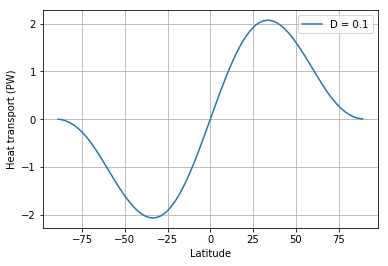

In [28]:
plt.plot(model.lat, inferred_heat_transport(energy_in, model.lat), label=('D = %0.1f' %D))
plt.ylabel('Heat transport (PW)')
plt.legend(); plt.grid()
plt.xlabel('Latitude')

The upshot: compared to observations, this model has a much too large equator-to-pole temperature gradient, and not enough poleward heat transport!

Apparently we need to increase the diffusivity to get a better fit.

____________
<a id='section7'></a>

## 7. Effects of diffusivity in the annual mean EBM
____________


### In-class investigation:

- Solve the annual-mean EBM (integrate out to equilibrium) over a range of different diffusivity parameters.
- Make three plots:
    - Global-mean temperature as a function of $D$
    - Equator-to-pole temperature difference $\Delta T$ as a function of $D$
    - Maximum poleward heat transport $\mathcal{H}_{max}$ as a function of $D$
- Choose a value of $D$ that gives a reasonable approximation to observations:
    - $\Delta T \approx 45$ ºC
    - $\mathcal{H}_{max} \approx 5.5$ PW

### One possible way to do this:

In [29]:
Darray = np.arange(0., 2.05, 0.05)

In [30]:
model_list = []
Tmean_list = []
deltaT_list = []
Hmax_list = []
for D in Darray:
    ebm = climlab.EBM_annual(A=210, B=2, a0=0.354, a2=0.25, D=D)
    ebm.integrate_years(20., verbose=False)
    Tmean = ebm.global_mean_temperature()
    deltaT = np.max(ebm.Ts) - np.min(ebm.Ts)
    energy_in = np.squeeze(ebm.ASR - ebm.OLR)
    Htrans = inferred_heat_transport(energy_in, ebm.lat)
    Hmax = np.max(Htrans)
    model_list.append(ebm)
    Tmean_list.append(Tmean)
    deltaT_list.append(deltaT)
    Hmax_list.append(Hmax)

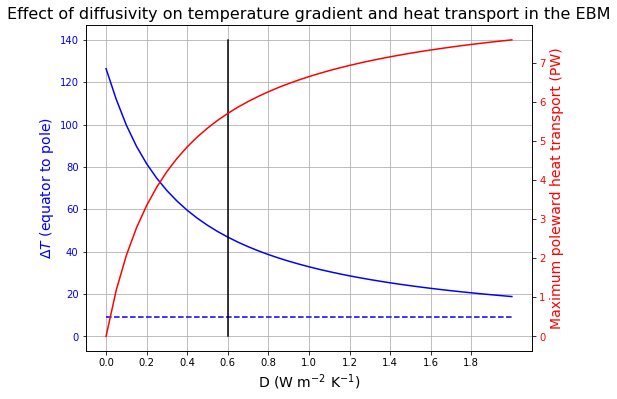

In [31]:
color1 = 'b'
color2 = 'r'

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.plot(Darray, deltaT_list, color=color1)
ax1.plot(Darray, Tmean_list, 'b--')
ax1.set_xlabel('D (W m$^{-2}$ K$^{-1}$)', fontsize=14)
ax1.set_xticks(np.arange(Darray[0], Darray[-1], 0.2))
ax1.set_ylabel('$\Delta T$ (equator to pole)', fontsize=14,  color=color1)
for tl in ax1.get_yticklabels():
    tl.set_color(color1)
ax2 = ax1.twinx()
ax2.plot(Darray, Hmax_list, color=color2)
ax2.set_ylabel('Maximum poleward heat transport (PW)', fontsize=14, color=color2)
for tl in ax2.get_yticklabels():
    tl.set_color(color2)
ax1.set_title('Effect of diffusivity on temperature gradient and heat transport in the EBM', fontsize=16)
ax1.grid()

ax1.plot([0.6, 0.6], [0, 140], 'k-')


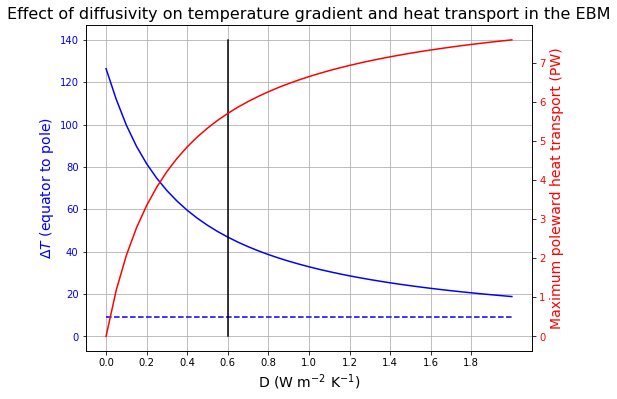

In [32]:
fig

When $D=0$, every latitude is in radiative equilibrium and the heat transport is zero. As we have already seen, this gives an equator-to-pole temperature gradient much too high.

When $D$ is **large**, the model is very efficient at moving heat poleward. The heat transport is large and the temperture gradient is weak.

The real climate seems to lie in a sweet spot in between these limits.

It looks like our fitting criteria are met reasonably well with $D=0.6$ W m$^{-2}$ K$^{-1}$

Also, note that the **global mean temperature** (plotted in dashed blue) is completely insensitive to $D$. Look at the EBM equation and convince yourself that this must be true, since the transport term vanishes from the global average, and there is no non-linear temperature dependence in this model.

____________
<a id='section8'></a>

## 8. Summary: parameter values in the diffusive EBM
____________

Our model is defined by the following equation

$$ C \frac{\partial T_s}{\partial t} = (1-\alpha) ~ Q - \left( A + B~T_s \right) + \frac{D}{\cos⁡\phi } \frac{\partial }{\partial \phi} \left(   \cos⁡\phi  ~ \frac{\partial T_s}{\partial \phi} \right) $$

with the albedo given by

$$ \alpha(\phi) = \alpha_0 + \alpha_2 P_2(\sin\phi) $$


We have chosen the following parameter values, which seems to give a reasonable fit to the observed **annual mean temperature and energy budget**:

- $ A = 210 ~ \text{W m}^{-2}$
- $ B = 2 ~ \text{W m}^{-2}~^\circ\text{C}^{-1} $
- $ a_0 = 0.354$
- $ a_2 = 0.25$
- $ D = 0.6 ~ \text{W m}^{-2}~^\circ\text{C}^{-1} $

There is one parameter left to choose: the heat capacity $C$. We can't use the annual mean energy budget and temperatures to guide this choice.

[Why?]

We will instead look at seasonally varying models in the next set of notes.

<div class="alert alert-success">
[Back to ATM 623 notebook home](../index.ipynb)
</div>

____________
## Credits

The author of this notebook is [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.

It was developed in support of [ATM 623: Climate Modeling](http://www.atmos.albany.edu/facstaff/brose/classes/ATM623_Spring2015/), a graduate-level course in the [Department of Atmospheric and Envionmental Sciences](http://www.albany.edu/atmos/index.php), offered in Spring 2015.
____________

____________
## Version information
____________


In [33]:
%load_ext version_information
%version_information numpy, matplotlib, xarray, climlab

Software versions
Python 2.7.12 64bit [GCC 4.2.1 (Based on Apple Inc. build 5658) (LLVM build 2336.11.00)]
IPython 5.3.0
OS Darwin 16.5.0 x86_64 i386 64bit
numpy 1.11.1
matplotlib 2.0.0
xarray 0.8.2
climlab 0.5.6
Wed Apr 12 14:31:46 2017 EDT